Import library-library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import datetime
import seaborn as sns

Membaca dataset, menampilkan jumlah kolom dan baris data, dan menampilkan 20 data teratas

In [2]:
#baca dataset
df = pd.read_csv('supermarket_sales - Sheet1.csv')


#melihat data
print(df.shape)
print(df.head(20))
print(df.describe())

(1000, 17)
     Invoice ID Branch       City Customer type  Gender  \
0   750-67-8428      A     Yangon        Member  Female   
1   226-31-3081      C  Naypyitaw        Normal  Female   
2   631-41-3108      A     Yangon        Normal    Male   
3   123-19-1176      A     Yangon        Member    Male   
4   373-73-7910      A     Yangon        Normal    Male   
5   699-14-3026      C  Naypyitaw        Normal    Male   
6   355-53-5943      A     Yangon        Member  Female   
7   315-22-5665      C  Naypyitaw        Normal  Female   
8   665-32-9167      A     Yangon        Member  Female   
9   692-92-5582      B   Mandalay        Member  Female   
10  351-62-0822      B   Mandalay        Member  Female   
11  529-56-3974      B   Mandalay        Member    Male   
12  365-64-0515      A     Yangon        Normal  Female   
13  252-56-2699      A     Yangon        Normal    Male   
14  829-34-3910      A     Yangon        Normal  Female   
15  299-46-1805      B   Mandalay        Memb

Dari info data didapatkan, bahwa data ini tidak mempunyai missing value

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
#cek for missing value
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# Analisis

pertama disini kita lihat quantity maksimal yang dibeli oleh customer

In [5]:
#melihat quantity tertinggi
df[df['Quantity'] == df['Quantity'].max()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.780,772.380,2/24/2019,11:38,Ewallet,735.6,4.761905,36.780,8.0
13,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10,21.595,453.495,2/7/2019,16:48,Ewallet,431.9,4.761905,21.595,8.2
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.690,749.490,3/29/2019,19:21,Cash,713.8,4.761905,35.690,5.7
49,574-22-5561,C,Naypyitaw,Member,Female,Fashion accessories,82.63,10,41.315,867.615,3/19/2019,17:08,Ewallet,826.3,4.761905,41.315,7.9
58,817-48-8732,A,Yangon,Member,Female,Home and lifestyle,72.35,10,36.175,759.675,1/20/2019,15:55,Cash,723.5,4.761905,36.175,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,1/1/2019,11:36,Credit card,846.3,4.761905,42.315,9.0
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.170,864.570,3/29/2019,19:12,Ewallet,823.4,4.761905,41.170,4.3
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.300,804.300,1/24/2019,18:10,Ewallet,766.0,4.761905,38.300,6.0
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.745,183.645,2/22/2019,18:35,Ewallet,174.9,4.761905,8.745,6.6


Untuk menganalisis penjualan dari setiap Branch kita pisahkan atau kita group tabel Branch dengan Quantity

In [6]:
#untuk menganalisis penjualan memisahkan mengambil tabel Branch dan Quantity
penjualan = df[['Branch','Quantity']]

branch = ['A','B','C']
penjualan = penjualan[ penjualan['Branch'].isin(branch)  ]

penjualan

,Branch,Quantity
0,A,7
1,C,5
2,A,7
3,A,8
4,A,7
...,...,...
995,C,1
996,B,10
997,A,1
998,A,1


Setelah di visualisasikan ternyata pelanggan di branch A banyak membeli barang dengan quantity 5, dan di Branch B customer mendominasi membeli dengan 3-4, dan pada Branch C  rerata pelanggan banyak membeli dengan quantity 1 dan 10.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd67d9d1e80>,
      dtype=object)

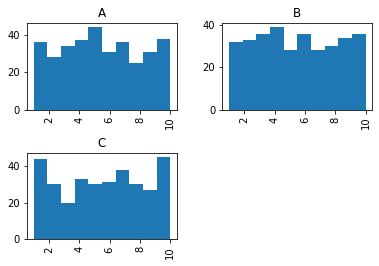

In [7]:
#pandas built in visualization
penjualan['Quantity'].hist(by=penjualan['Branch'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd67d80dd30>,
      dtype=object)

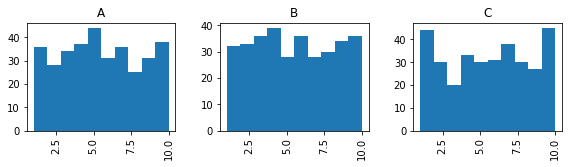

In [8]:
penjualan['Quantity'].hist(by=penjualan['Branch'], layout=(1,5), figsize=(16,2))

Kita disini mencari nilai rating tertinggi yg diberikan customer untuk pelayanan pembelian di supermarket
Dan didapatkan rating 10 pada 5 invoice id yang memberikan rating, cabang C 1 rating 10, cabang B 3 rating 10 dan menjadi cabang terbanyak dengan rating 10, kemudian cabang A 1 rating 10.

In [9]:
#melihat rating tertinggi
df[df['Rating'] == df['Rating'].max()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
60,285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2/15/2019,17:47,Credit card,74.22,4.761905,3.7110,10.0
62,347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2/3/2019,13:40,Ewallet,495.63,4.761905,24.7815,10.0
159,423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,3/27/2019,19:18,Ewallet,560.34,4.761905,28.0170,10.0
387,725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2/20/2019,16:49,Credit card,323.20,4.761905,16.1600,10.0
853,866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2/25/2019,11:58,Ewallet,527.90,4.761905,26.3950,10.0


Disini mengambil tabel product line dan quantity untuk melihat penjualan product



In [10]:
#mengambil tabel product line dan quantity
penjualan_product = df[['Product line','Quantity']]

product = ['Electronic accessories','BFashion accessories','Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel']
penjualan_product = penjualan_product[ penjualan_product['Product line'].isin(product)  ]

penjualan_product

,Product line,Quantity
0,Health and beauty,7
1,Electronic accessories,5
2,Home and lifestyle,7
3,Health and beauty,8
4,Sports and travel,7
...,...,...
994,Electronic accessories,1
995,Health and beauty,1
996,Home and lifestyle,10
997,Food and beverages,1


Dari visualisasi histogram kita dapat melihat bahwa product home and lifestyle jarang dibeli dengan pembelian banyak, paling tinggi mereka membeli 5-6 produk untuk maksimal pembelian, sedangkan product line electronic accesories dan sports and travel mereka sering di beli dengan quantity terbanyak, food and beverages banyak dibeli dengan quantity 2-5 , dan health berauty banyak dibeli dengan quantity 5-6

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd67d217340>,
      dtype=object)

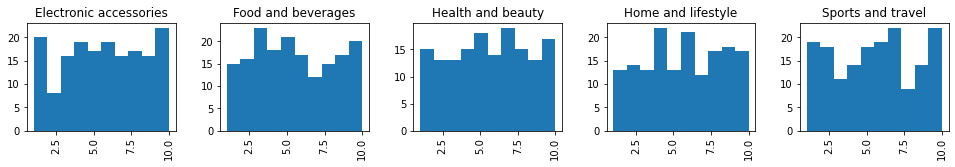

In [11]:
#visualization
penjualan_product['Quantity'].hist(by=penjualan_product['Product line'], layout=(1,5), figsize=(16,2))

Berapa jumlah uang yang di dapatkan?


In [12]:
df['Unit price'].sum()

55672.130000000005

Untuk melihat kota dengan total pendapatan terbanyak kita dapat melihat dengan mengambil data city dan total

In [13]:
kota_total = df[['Branch','Total']]

city = ['A','B','C']
kota_total = kota_total[ kota_total['Branch'].isin(city)]

kota_total

,Branch,Total
0,A,548.9715
1,C,80.2200
2,A,340.5255
3,A,489.0480
4,A,634.3785
...,...,...
995,C,42.3675
996,B,1022.4900
997,A,33.4320
998,A,69.1110


Setelah divisualisasikan kita mendapatkan bahwa Branch C  menjadi branch dengan total pendapatan paling tinggi

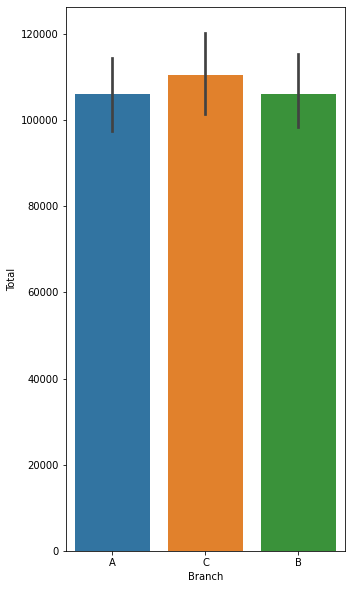

In [14]:
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(x = 'Branch',
            y = 'Total',
            data = df,estimator=sum)

plt.show()

Disini kita coba visualisasikan total setiap tanggalnya. Dan dapat dilihat bahwa ternyata pada tanggal 9 bulan ke 3 supermarket ini mendapat penjualan terbanyak, dibuktikan bahwa total penjualan di tanggal tersebut tinggi

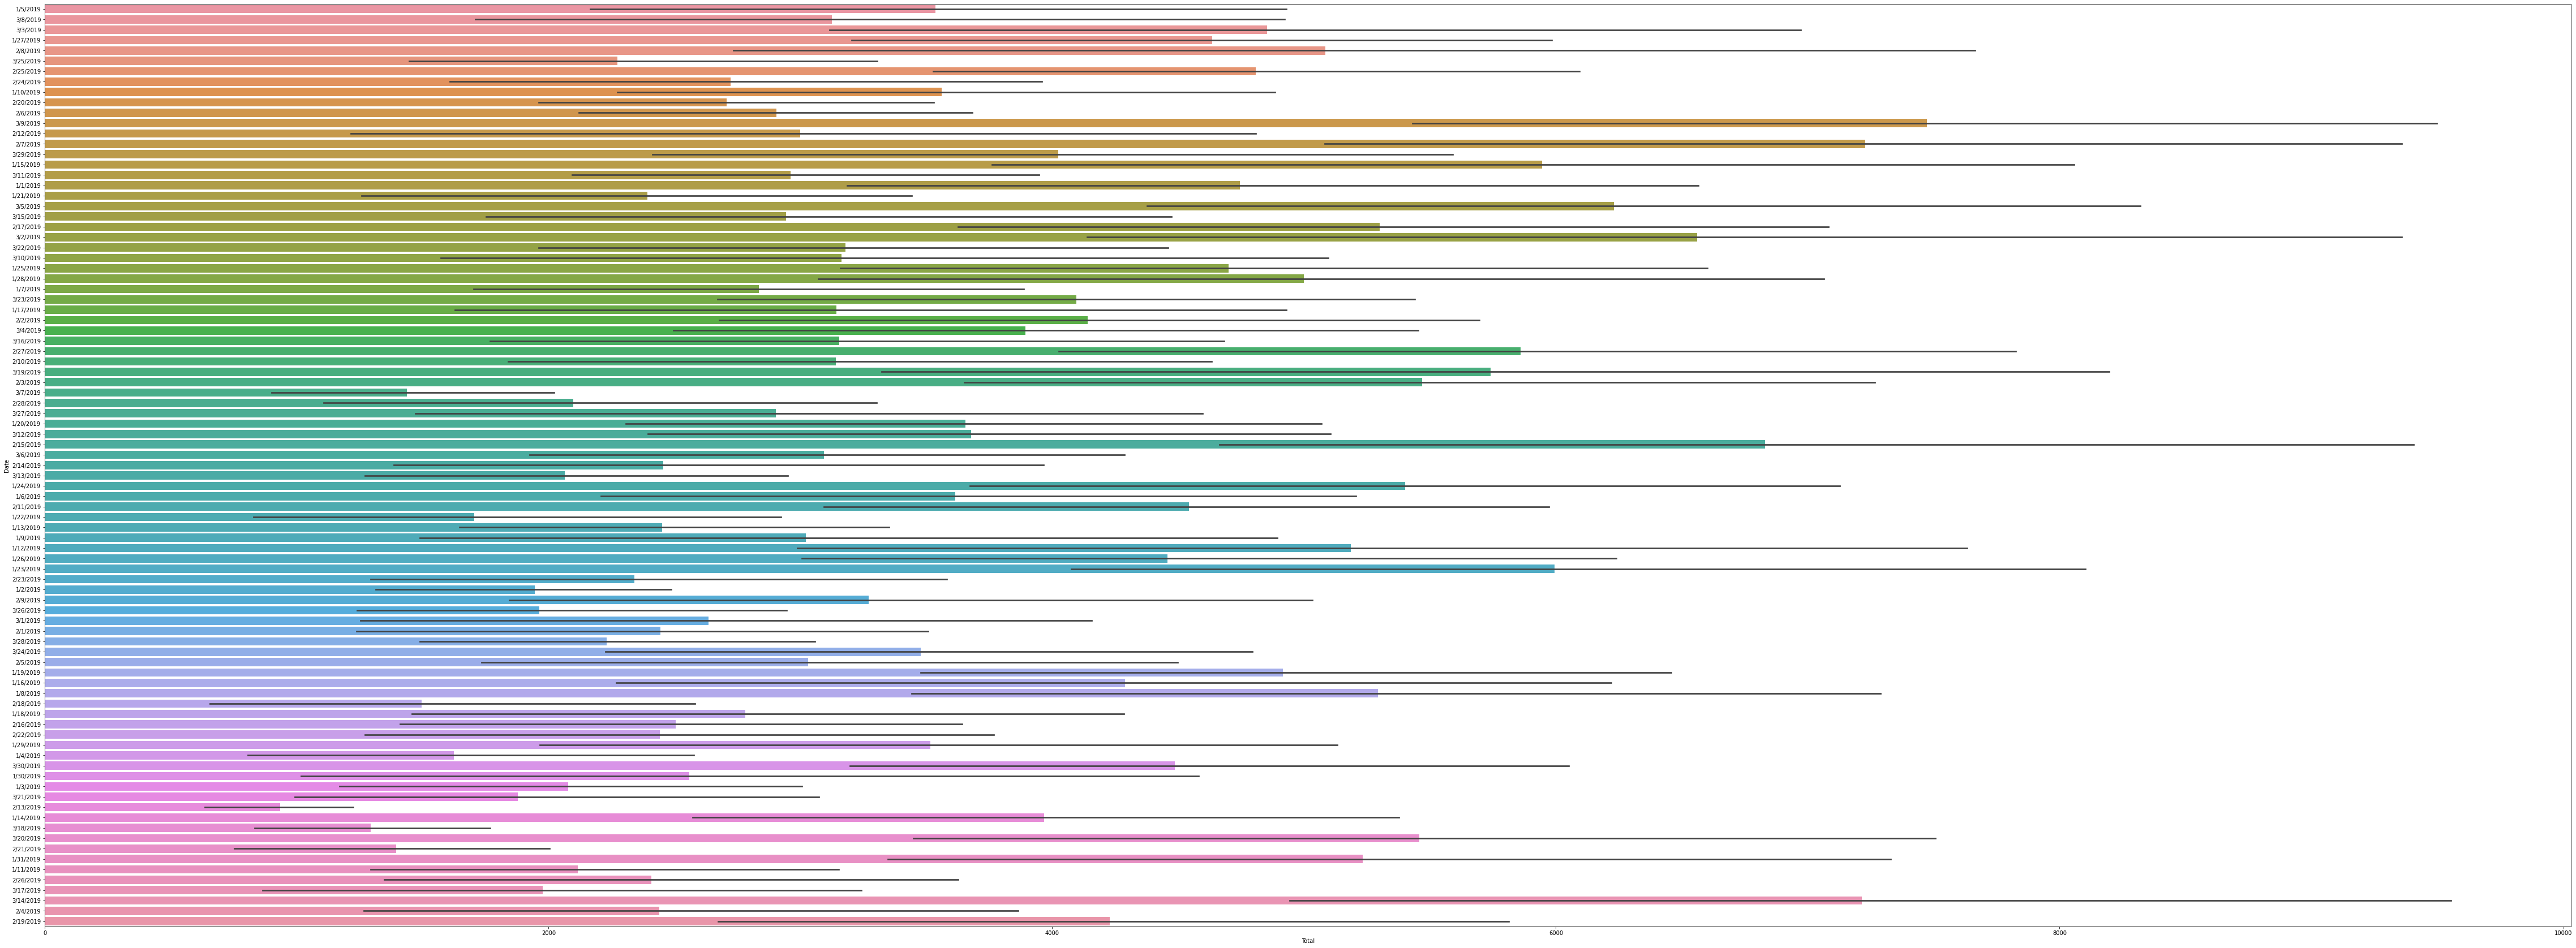

In [15]:
fig, ax = plt.subplots(figsize=(80,30))
sns.barplot(x = 'Total',
            y = 'Date',
            data = df,estimator=sum)

plt.show()

Menghitung gmv dan dimasukan ke data tersebut

In [16]:
df['gmv'] = df['Unit price']*df['Quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % df.shape)
print('Lima data teratas: ')
print(df.head())

Ukuran dataset: 1000 baris dan 18 kolom

Lima data teratas: 
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  

Membuat line chart pertumbuhan GMV (Gross Merchandise Value)
Setap bulannya
Dan di dapatkan pertumbuhan GMV sempat menurun pada bulan kedua dan naik lagi dibulan ketiga

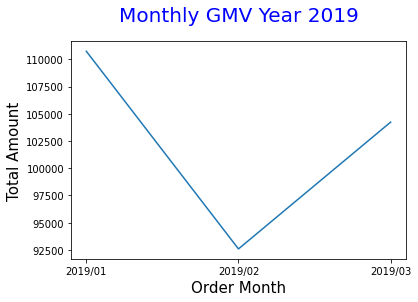

In [17]:
df['month'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").strftime('%Y/%m'))
df['gmv'] = df['Unit price']*df['Quantity']

monthly_amount = df.groupby('month')['gmv'].sum().reset_index()

plt.plot(monthly_amount['month'], monthly_amount['gmv'])
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

Melihat pertumbuhan GMV setiap bulan pada aspek product,produk electronic accesories dan health and beauty menurun sedikit namun product ini menjadi product yg stabil setiap bulannya pada gmv, sedangkan untuk home and life style, sport and travel pernah menurun cukup signifikan namun dapat meningkat sangat tinggi, dan untuk produk food and beverages and fashion accesories dia cukup meningkat tinggi di bulan kedua namun mengalami penurunan tapi tidak cukup tinggi

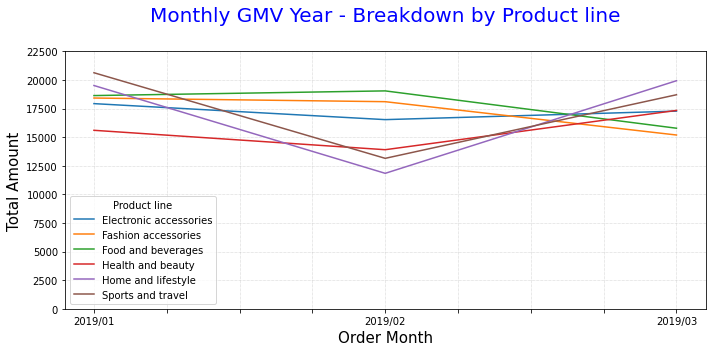

In [18]:
#membuat kolom gmv
df['gmv'] = df['Unit price']*df['Quantity']

# Buat Multi-Line Chart
df.groupby(['month', 'Product line'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year - Breakdown by Product line', loc='center', pad=30, fontsize = 20, color ='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize = 15)
plt.grid(color = 'darkgray', linestyle=':', linewidth = 0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

GMV untuk aspek Branch, GMV branch B cukup stabil, sedangkan GMV branch A dan C pernah menurun namun naik kembali

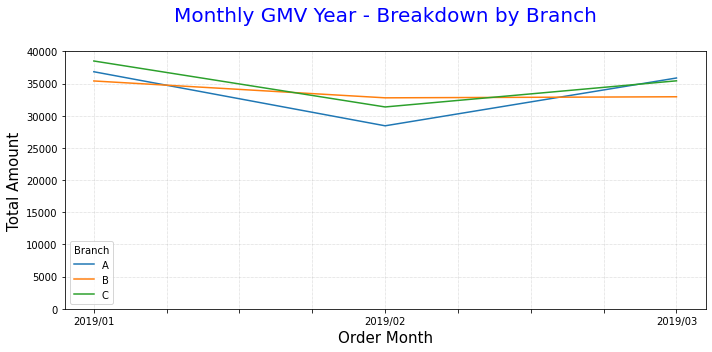

In [19]:
#membuat kolom gmv
df['gmv'] = df['Unit price']*df['Quantity']

# Buat Multi-Line Chart
df.groupby(['month', 'Branch'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year - Breakdown by Branch', loc='center', pad=30, fontsize = 20, color ='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize = 15)
plt.grid(color = 'darkgray', linestyle=':', linewidth = 0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

Insight keseluruhan yang bisa di dapatkan dari data yang sudah di explore dan divisualisasikan, branch C menjadi branch dengan total penjualan terbanyak, sehingga untuk branch A dan branch B dapat meningkatkan penjualan mereka. Dan juga, didapatkan bahwa pertumbuhan GMV setiap bulan nya, mengalami penurunan dibulan kedua baik dari sisi Product Line ataupun Kinerja setiap Branch, Dan juga rating yg didapatkan oleh supermarket berada di kisaran 6-7 pelanggan memberikan rating. 